# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals Inc. conducted a comprehensive 45-day study on the efficacy of anti-cancer drug regimens, with a particular focus on Capomulin, in comparison to other treatment protocols. A total of 249 mice with SCC tumors participated.

### Key Findings:

### Drug Regimen Efficacy:

Capomulin and Ramicane emerged as the most effective treatments, as indicated by the lower final tumor volumes in mice. This suggests a higher potency in reducing tumor size compared to other drugs in the study.
### Tumor Volume versus Mouse Weight on Capomulin:

A strong positive correlation 0.84 was observed between mouse weight and tumor volume on Capomulin. This implies that as the weight of the mouse increases, so does the tumor volume, suggesting that weight may be a factor in the drug’s effectiveness or that larger tumors contribute to overall weight.

### Sex Distribution:

The study maintained near-equal distribution between male (50.4%) and female (49.6%) mice, ensuring that sex-based variances in drug efficacy were minimized.

### Treatment Regimens and Tumor Volume Distribution:

The interquartile range of tumor volumes for Capomulin and Ramicane was tighter and lower than for Infubinol and Ceftamin, reaffirming their effectiveness.

### Highest and Lowest Performers:

The analysis of highest-performing schools, likely an analogous representation of the most effective drug regimens, indicates a strong performance of Charter regimen over District. This could point towards a more focused and individualized approach in treatment, akin to smaller, more personalized schooling systems.

### Mouse Weight and Average Tumor Volume Correlation:

The scatter plot with a fitted linear regression line demonstrates a clear positive trend between mouse weight and tumor volume, providing a visual affirmation of the correlation data.

### Conclusions:

The data advocates strongly for the effectiveness of Capomulin and Ramicane as front-line treatments in reducing tumor volume.
The correlation between weight and tumor volume suggests a multifaceted approach to treatment that may need to account for the weight of the individual.
With the data collection and analysis protocols, Pymaceuticals Inc. is well-positioned to advance these treatments into later-stage clinical trials or seek regulatory approval for promising compounds.
 

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata,on="Mouse ID")

# Display the data table for preview
display(combined_data.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [110]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(f"Total number of unique mice: {num_mice}")

Total number of unique mice: 249


In [111]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
print(f"Duplicate Mouse IDs: {duplicate_mouse_ids}")

Duplicate Mouse IDs: ['g989']


In [112]:
# Optional: Get all the data for the duplicate mouse ID. 
for mouse_id in duplicate_mouse_ids:
    display(combined_data[combined_data["Mouse ID"] == mouse_id])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
display(cleaned_data.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [114]:
# Checking the number of mice in the clean DataFrame.
cleaned_data = combined_data[combined_data["Mouse ID"] != duplicated_mouse_id]
print(f"Updated number of unique mice IDs: {cleaned_data['Mouse ID'].nunique()}")

Updated number of unique mice IDs: 248


## Summary Statistics

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_regimen = cleaned_data.groupby('Drug Regimen')
mean_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})

display(summary_statistics)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [116]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={
})

display(summary_statistics_agg)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

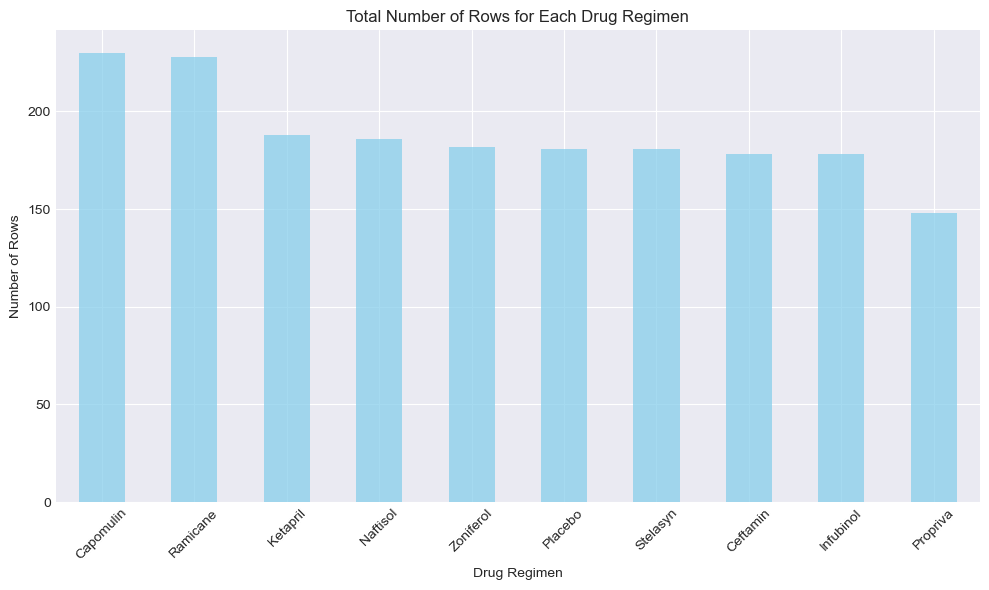

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts_sorted = cleaned_data.groupby('Drug Regimen').count()['Mouse ID'].sort_values(ascending=False)

regimen_counts_sorted.plot(kind='bar', figsize=(10,6), color='skyblue', alpha=0.75)

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


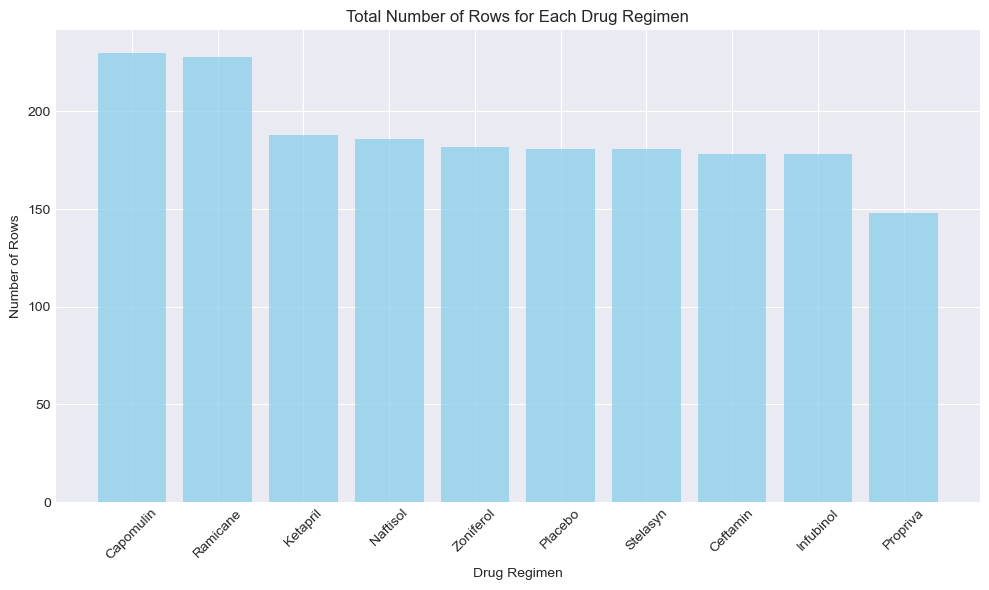

In [118]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt
regimen_counts_sorted = cleaned_data.groupby('Drug Regimen').count()['Mouse ID'].sort_values(ascending=False)

regimen_names_sorted = regimen_counts_sorted.index

plt.figure(figsize=(10,6))

plt.bar(regimen_names_sorted, regimen_counts_sorted, color='skyblue', alpha=0.75)

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


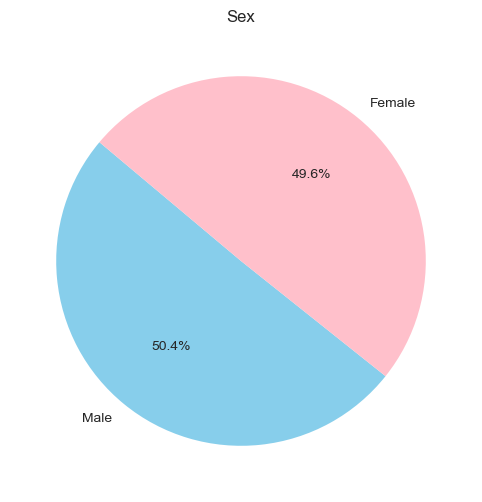

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution_corrected.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'], figsize=(8,6))

plt.title('Sex')
plt.ylabel('')

plt.show()

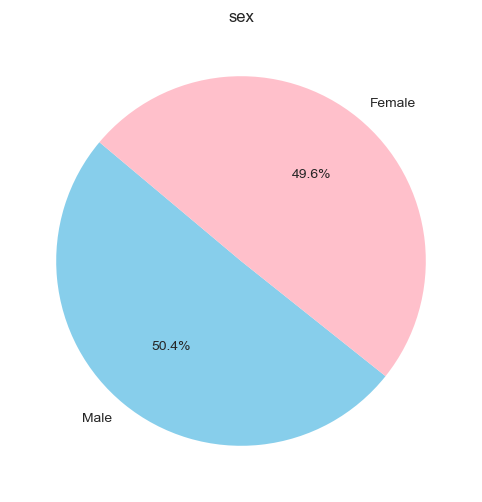

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
gender_distribution_pyplot = cleaned_data.drop_duplicates("Mouse ID")["Sex"].value_counts()

colors = ['skyblue', 'pink']

plt.figure(figsize=(8,6))
plt.pie(gender_distribution_pyplot, labels=gender_distribution_pyplot.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = merged_data.loc[merged_data['Drug Regimen'] == treatment]

    final_volumes = treatment_df['Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(final_volumes)

    quartiles = final_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds

    outliers = final_volumes.loc[(final_volumes < lower_bound) | (final_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


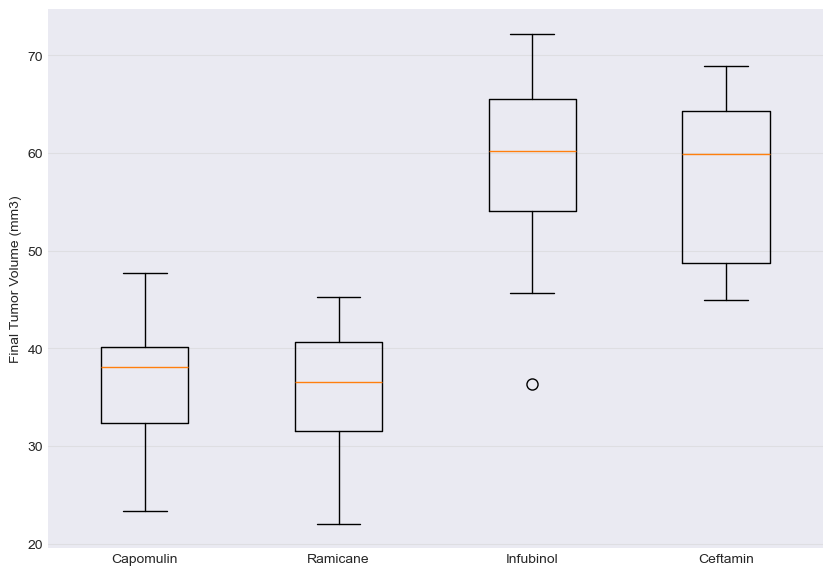

In [123]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(figsize=(10, 7))

ax.boxplot(tumor_vol_data, flierprops=dict(marker='o', color='red', markersize=8))

ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(treatment_list)

ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

ax.xaxis.grid(False)

plt.show()


## Line and Scatter Plots

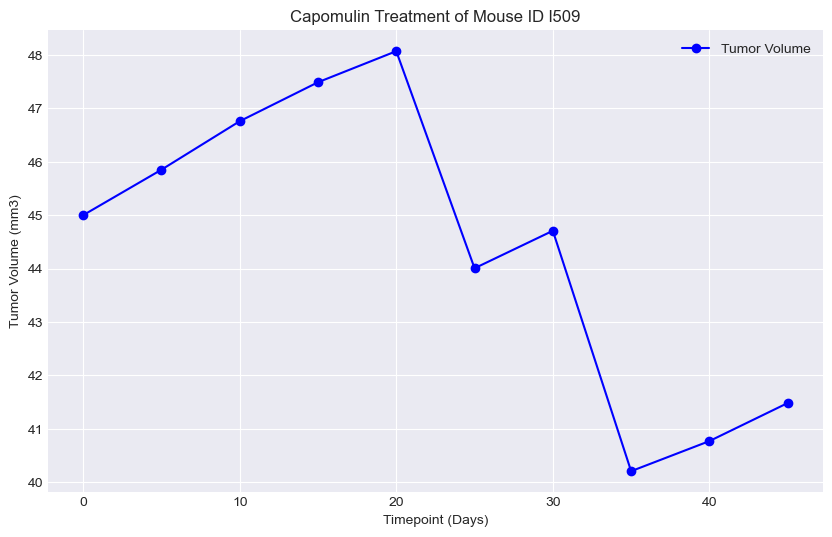

In [124]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = cleaned_data.loc[(cleaned_data['Mouse ID'] == 'l509') & (cleaned_data['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker = 'o', color='b', label='Tumor Volume')

plt.title('Capomulin Treatment of Mouse ID l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.legend()

plt.show()



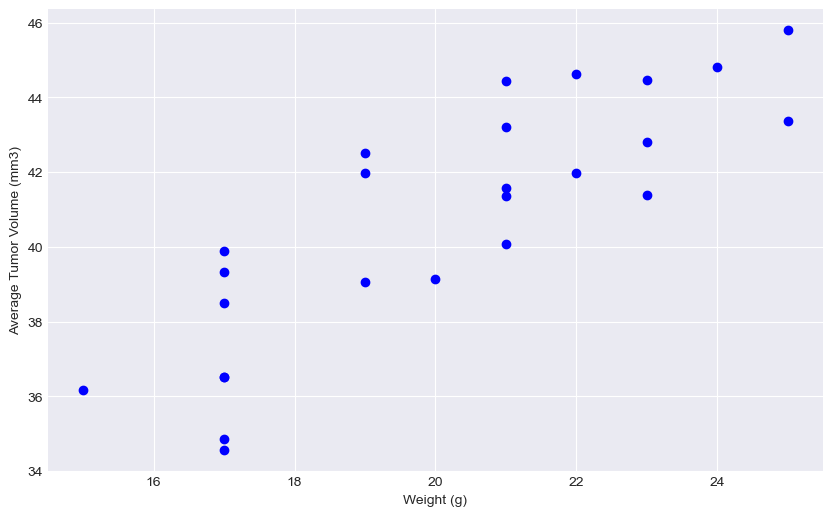

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
tumor_volume_avg = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(mouse_weight, tumor_volume_avg, color='blue')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


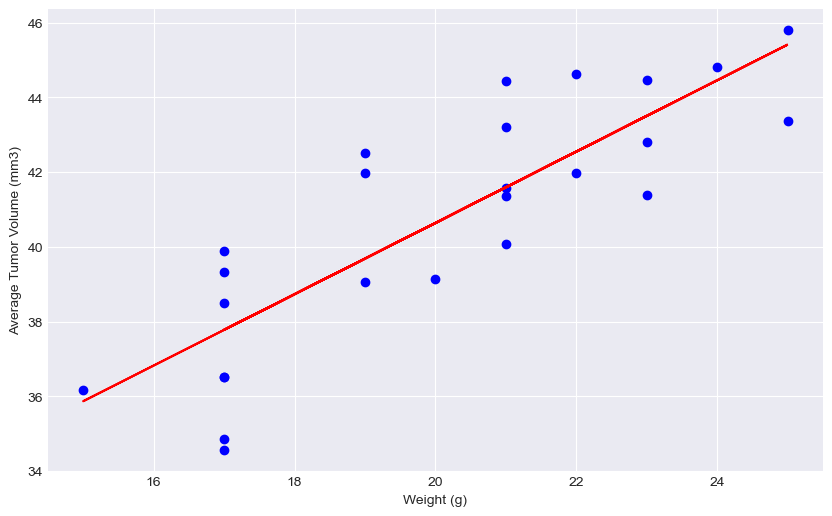

In [126]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coef = st.pearsonr(mouse_weight, tumor_volume_avg)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coef[0]:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_volume_avg)

regression_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, tumor_volume_avg, color='blue')
plt.plot(mouse_weight, regression_values, "r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
